# <font color="#CA3532">Explicabilidad de redes neuronales</font>

Ejemplo detallado con un dataset de Kaggle: **Loan Approval Classification Dataset**

https://www.kaggle.com/datasets/taweilo/loan-approval-classification-data

In [195]:
import tensorflow as tf

import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
import kagglehub

## <font color="#CA3532">Carga de los datos del problema</font>

In [2]:
# Download latest version
path = kagglehub.dataset_download("taweilo/loan-approval-classification-data")

print("Path to dataset files:", path)

100%|████████████████████████████████████████| 751k/751k [00:00<00:00, 1.47MB/s]

Extracting files...
Path to dataset files: /home/christian/.cache/kagglehub/datasets/taweilo/loan-approval-classification-data/versions/1


### <font color="#CA3532">Primer vistazo de los datos</font>

In [142]:
data = pd.read_csv(path + "/loan_data.csv")
data

,person_age,person_gender,person_education,person_income,person_emp_exp,person_home_ownership,loan_amnt,loan_intent,loan_int_rate,loan_percent_income,cb_person_cred_hist_length,credit_score,previous_loan_defaults_on_file,loan_status
0,22.0,female,Master,71948.0,0,RENT,35000.0,PERSONAL,16.02,0.49,3.0,561,No,1
1,21.0,female,High School,12282.0,0,OWN,1000.0,EDUCATION,11.14,0.08,2.0,504,Yes,0
2,25.0,female,High School,12438.0,3,MORTGAGE,5500.0,MEDICAL,12.87,0.44,3.0,635,No,1
3,23.0,female,Bachelor,79753.0,0,RENT,35000.0,MEDICAL,15.23,0.44,2.0,675,No,1
4,24.0,male,Master,66135.0,1,RENT,35000.0,MEDICAL,14.27,0.53,4.0,586,No,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
44995,27.0,male,Associate,47971.0,6,RENT,15000.0,MEDICAL,15.66,0.31,3.0,645,No,1
44996,37.0,female,Associate,65800.0,17,RENT,9000.0,HOMEIMPROVEMENT,14.07,0.14,11.0,621,No,1
44997,33.0,male,Associate,56942.0,7,RENT,2771.0,DEBTCONSOLIDATION,10.02,0.05,10.0,668,No,1
44998,29.0,male,Bachelor,33164.0,4,RENT,12000.0,EDUCATION,13.23,0.36,6.0,604,No,1


In [143]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 45000 entries, 0 to 44999
Data columns (total 14 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   person_age                      45000 non-null  float64
 1   person_gender                   45000 non-null  object 
 2   person_education                45000 non-null  object 
 3   person_income                   45000 non-null  float64
 4   person_emp_exp                  45000 non-null  int64  
 5   person_home_ownership           45000 non-null  object 
 6   loan_amnt                       45000 non-null  float64
 7   loan_intent                     45000 non-null  object 
 8   loan_int_rate                   45000 non-null  float64
 9   loan_percent_income             45000 non-null  float64
 10  cb_person_cred_hist_length      45000 non-null  float64
 11  credit_score                    45000 non-null  int64  
 12  previous_loan_defaults_on_file  

In [144]:
data.describe()

,person_age,person_income,person_emp_exp,loan_amnt,loan_int_rate,loan_percent_income,cb_person_cred_hist_length,credit_score,loan_status
count,45000.000000,4.500000e+04,45000.000000,45000.000000,45000.000000,45000.000000,45000.000000,45000.000000,45000.000000
mean,27.764178,8.031905e+04,5.410333,9583.157556,11.006606,0.139725,5.867489,632.608756,0.222222
std,6.045108,8.042250e+04,6.063532,6314.886691,2.978808,0.087212,3.879702,50.435865,0.415744
min,20.000000,8.000000e+03,0.000000,500.000000,5.420000,0.000000,2.000000,390.000000,0.000000
25%,24.000000,4.720400e+04,1.000000,5000.000000,8.590000,0.070000,3.000000,601.000000,0.000000
50%,26.000000,6.704800e+04,4.000000,8000.000000,11.010000,0.120000,4.000000,640.000000,0.000000
75%,30.000000,9.578925e+04,8.000000,12237.250000,12.990000,0.190000,8.000000,670.000000,0.000000
max,144.000000,7.200766e+06,125.000000,35000.000000,20.000000,0.660000,30.000000,850.000000,1.000000


In [145]:
data.isna().sum()

person_age                        0
person_gender                     0
person_education                  0
person_income                     0
person_emp_exp                    0
person_home_ownership             0
loan_amnt                         0
loan_intent                       0
loan_int_rate                     0
loan_percent_income               0
cb_person_cred_hist_length        0
credit_score                      0
previous_loan_defaults_on_file    0
loan_status                       0
dtype: int64

## <font color="#CA3532">Preprocesamiento</font>

### <font color="#CA3532">Person Age</font>

Age of the person

In [76]:
variable = data["person_age"]

<Axes: >

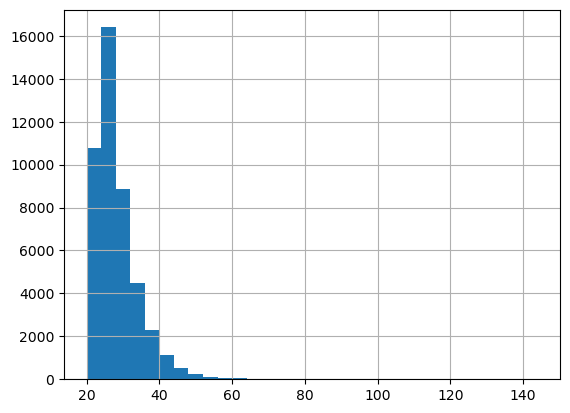

In [77]:
variable.hist(bins=31)

<Axes: >

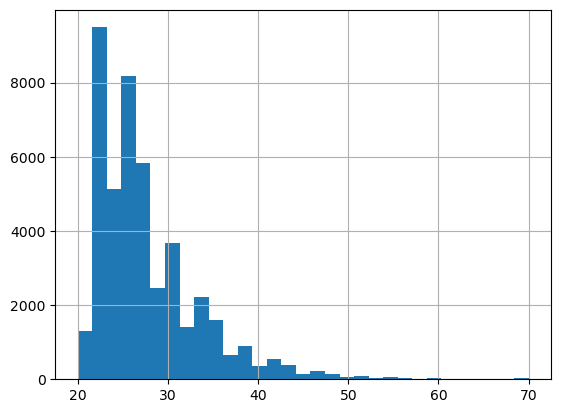

In [78]:
variable = np.clip(variable, 0, 70)
variable.hist(bins=31)

<Axes: >

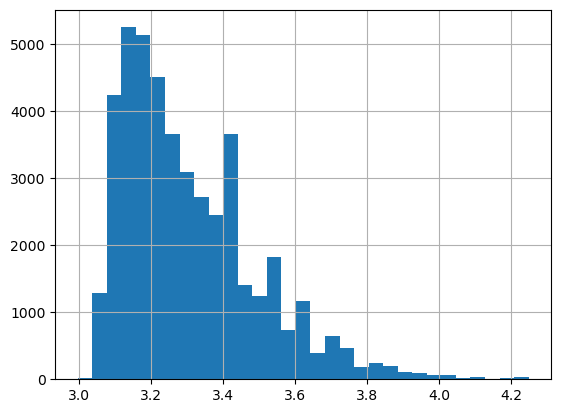

In [79]:
variable = np.log(variable)
variable.hist(bins=31)

### <font color="#CA3532">Person Income</font>

Annual income

<Axes: >

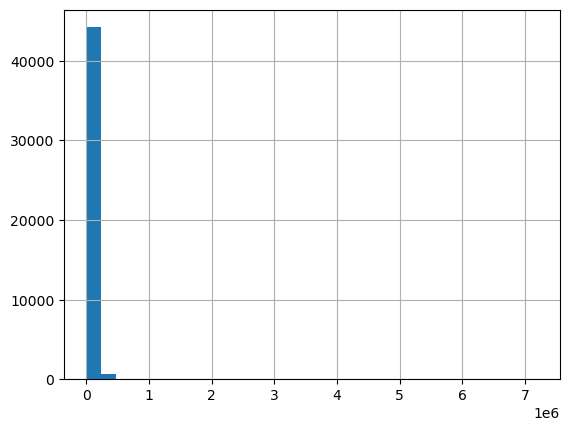

In [43]:
variable = data["person_income"]
variable.hist(bins=31)

<Axes: >

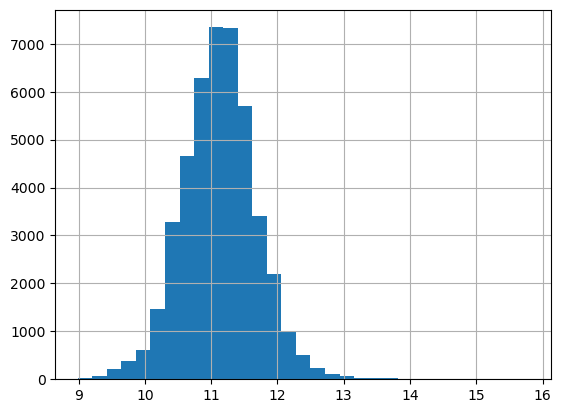

In [45]:
np.log(variable).hist(bins=31)

### <font color="#CA3532">Person Emp Exp</font>

Years of employment experience

<Axes: >

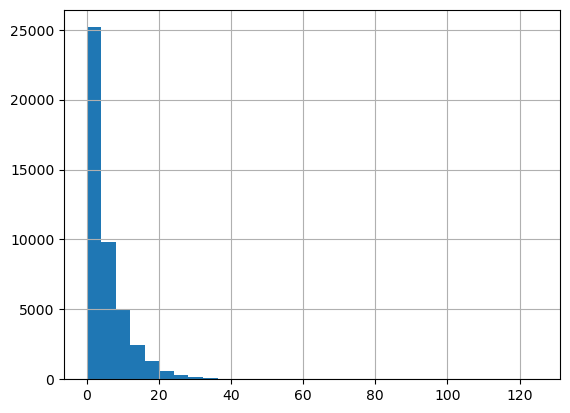

In [61]:
variable = data["person_emp_exp"]
variable.hist(bins=31)

<Axes: >

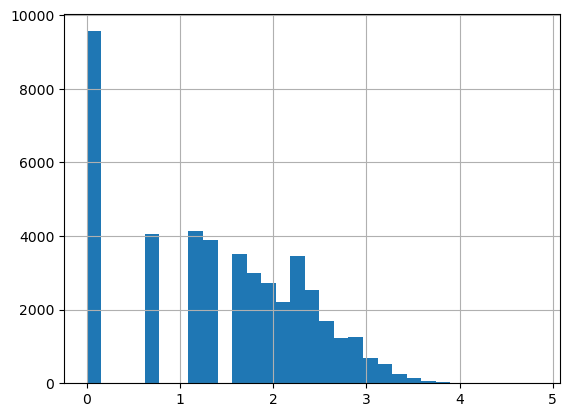

In [62]:
variable = np.log(variable+1)
variable.hist(bins=31)

### <font color="#CA3532">Person Home Ownership</font>

In [85]:
variable = data["person_home_ownership"]
variable.unique()

array(['RENT', 'OWN', 'MORTGAGE', 'OTHER'], dtype=object)

In [87]:
pd.get_dummies(variable, prefix="person_home_ownership_")

,person_home_ownership__MORTGAGE,person_home_ownership__OTHER,person_home_ownership__OWN,person_home_ownership__RENT
0,0,0,0,1
1,0,0,1,0
2,1,0,0,0
3,0,0,0,1
4,0,0,0,1
...,...,...,...,...
44995,0,0,0,1
44996,0,0,0,1
44997,0,0,0,1
44998,0,0,0,1


### <font color="#CA3532">Loan Amnt</font>

Loan amount requested

<Axes: >

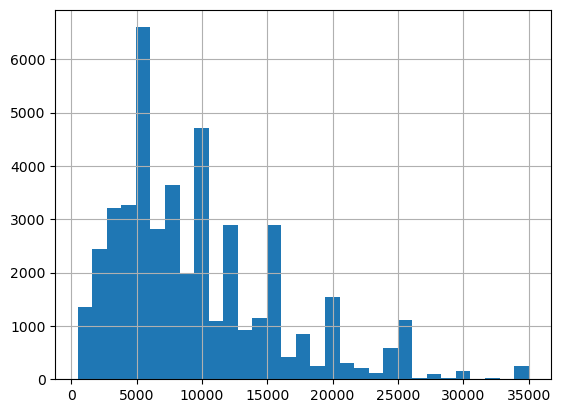

In [80]:
variable = data["loan_amnt"]
variable.hist(bins=31)

<Axes: >

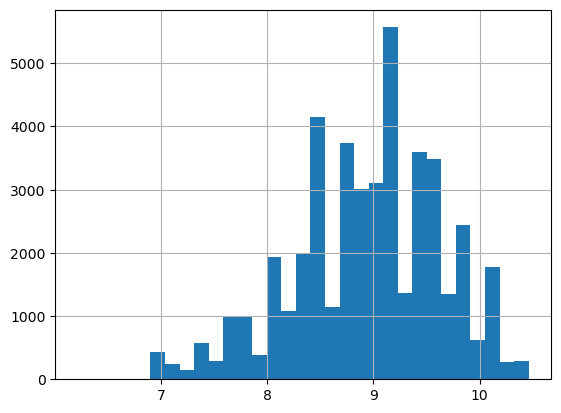

In [81]:
variable = np.log(variable)
variable.hist(bins=31)

### <font color="#CA3532">Loan Intent</font>

Purpose of the loan

In [92]:
variable = data["loan_intent"]
variable.unique()

array(['PERSONAL', 'EDUCATION', 'MEDICAL', 'VENTURE', 'HOMEIMPROVEMENT',
       'DEBTCONSOLIDATION'], dtype=object)

In [93]:
pd.get_dummies(variable, prefix="loan_intent_")

,loan_intent__DEBTCONSOLIDATION,loan_intent__EDUCATION,loan_intent__HOMEIMPROVEMENT,loan_intent__MEDICAL,loan_intent__PERSONAL,loan_intent__VENTURE
0,0,0,0,0,1,0
1,0,1,0,0,0,0
2,0,0,0,1,0,0
3,0,0,0,1,0,0
4,0,0,0,1,0,0
...,...,...,...,...,...,...
44995,0,0,0,1,0,0
44996,0,0,1,0,0,0
44997,1,0,0,0,0,0
44998,0,1,0,0,0,0


### <font color="#CA3532">Loan Int Rate</font>

Loan interest rate

<Axes: >

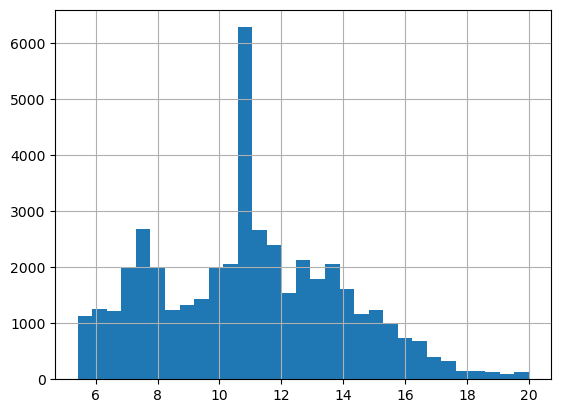

In [96]:
variable = data["loan_int_rate"]
variable.hist(bins=31)

### <font color="#CA3532">Loan Percent Income</font>

Loan amount as a percentage of annual income

<Axes: >

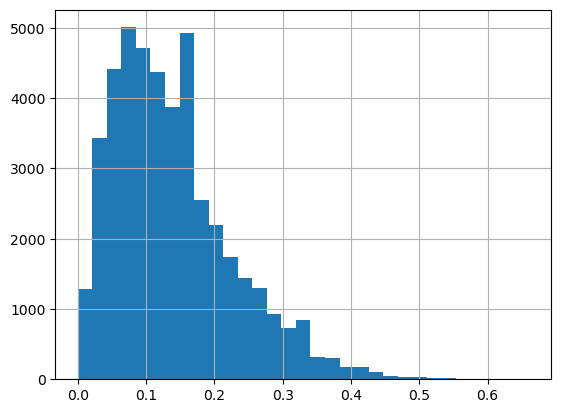

In [106]:
variable = data["loan_percent_income"]
variable.hist(bins=31)

<Axes: >

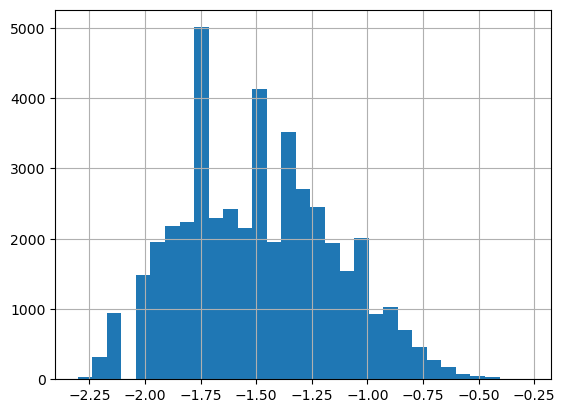

In [107]:
variable = np.log(variable+1e-1)
variable.hist(bins=31)

### <font color="#CA3532">Cb Person Cred Hist Length</font>

Length of credit history in years

<Axes: >

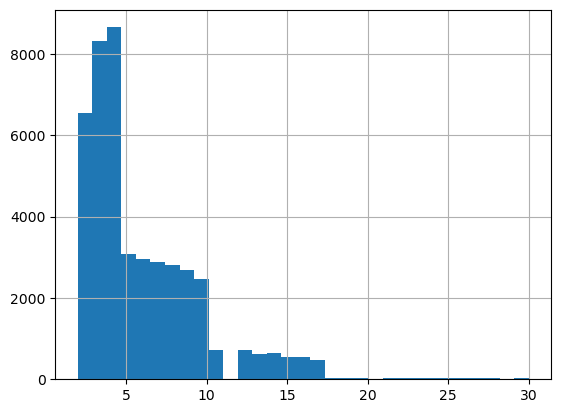

In [122]:
variable = data["cb_person_cred_hist_length"]
variable.hist(bins=31)

<Axes: >

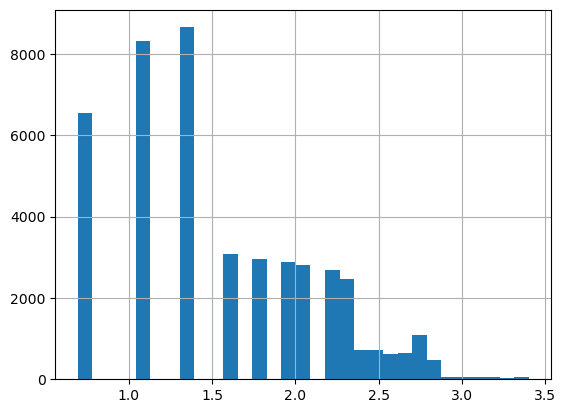

In [123]:
variable = np.log(variable)
variable.hist(bins=31)

### <font color="#CA3532">Credit Score</font>

Credit score of the person

<Axes: >

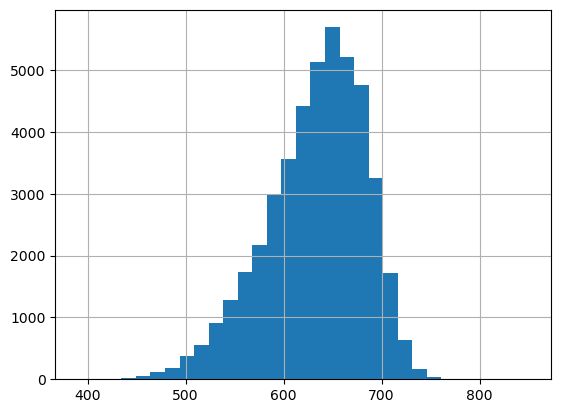

In [126]:
variable = data["credit_score"]
variable.hist(bins=31)

### <font color="#CA3532">Previous Loan Defaults on File</font>

Indicator of previous loan defaults

In [133]:
variable = data["previous_loan_defaults_on_file"]
variable.unique()

array(['No', 'Yes'], dtype=object)

In [134]:
variable.replace({"No": 0, "Yes": 1})

0        0
1        1
2        0
3        0
4        0
        ..
44995    0
44996    0
44997    0
44998    0
44999    0
Name: previous_loan_defaults_on_file, Length: 45000, dtype: int64

### <font color="#CA3532">TODO JUNTO</font>

In [146]:
data["person_age"] = np.log(np.clip(data["person_age"], 0, 70))
data["person_gender"] = data["person_gender"].replace({"female":0, "male":1})
data["person_education"] = data["person_education"].replace({"High School":0, "Associate":1, "Bachelor":2, "Master":3, "Doctorate":4})
data["person_income"] = np.log(data["person_income"])
data["person_emp_exp"] = np.log(data["person_emp_exp"]+1)
data = pd.concat((data, pd.get_dummies(data["person_home_ownership"], prefix="person_home_ownership_")), axis=1)
data = data.drop(columns=["person_home_ownership"])
data["loan_amnt"] = np.log(data["loan_amnt"])
data = pd.concat((data, pd.get_dummies(data["loan_intent"], prefix="loan_intent_")), axis=1)
data = data.drop(columns=["loan_intent"])
data["loan_percent_income"] = np.log(data["loan_percent_income"]+0.1)
data["cb_person_cred_hist_length"] = np.log(data["cb_person_cred_hist_length"])
data["previous_loan_defaults_on_file"] = data["previous_loan_defaults_on_file"].replace({"No": 0, "Yes": 1})

In [149]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 45000 entries, 0 to 44999
Data columns (total 22 columns):
 #   Column                           Non-Null Count  Dtype  
---  ------                           --------------  -----  
 0   person_age                       45000 non-null  float64
 1   person_gender                    45000 non-null  int64  
 2   person_education                 45000 non-null  int64  
 3   person_income                    45000 non-null  float64
 4   person_emp_exp                   45000 non-null  float64
 5   loan_amnt                        45000 non-null  float64
 6   loan_int_rate                    45000 non-null  float64
 7   loan_percent_income              45000 non-null  float64
 8   cb_person_cred_hist_length       45000 non-null  float64
 9   credit_score                     45000 non-null  int64  
 10  previous_loan_defaults_on_file   45000 non-null  int64  
 11  loan_status                      45000 non-null  int64  
 12  person_home_owners

In [152]:
data

,person_age,person_gender,person_education,person_income,person_emp_exp,loan_amnt,loan_int_rate,loan_percent_income,cb_person_cred_hist_length,credit_score,...,person_home_ownership__MORTGAGE,person_home_ownership__OTHER,person_home_ownership__OWN,person_home_ownership__RENT,loan_intent__DEBTCONSOLIDATION,loan_intent__EDUCATION,loan_intent__HOMEIMPROVEMENT,loan_intent__MEDICAL,loan_intent__PERSONAL,loan_intent__VENTURE
0,3.091042,0,3,11.183699,0.000000,10.463103,16.02,-0.527633,1.098612,561,...,0,0,0,1,0,0,0,0,1,0
1,3.044522,0,0,9.415890,0.000000,6.907755,11.14,-1.714798,0.693147,504,...,0,0,1,0,0,1,0,0,0,0
2,3.218876,0,0,9.428512,1.386294,8.612503,12.87,-0.616186,1.098612,635,...,1,0,0,0,0,0,0,1,0,0
3,3.135494,0,2,11.286690,0.000000,10.463103,15.23,-0.616186,0.693147,675,...,0,0,0,1,0,0,0,1,0,0
4,3.178054,1,3,11.099453,0.693147,10.463103,14.27,-0.462035,1.386294,586,...,0,0,0,1,0,0,0,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
44995,3.295837,1,1,10.778352,1.945910,9.615805,15.66,-0.891598,1.098612,645,...,0,0,0,1,0,0,0,1,0,0
44996,3.610918,0,1,11.094375,2.890372,9.104980,14.07,-1.427116,2.397895,621,...,0,0,0,1,0,0,1,0,0,0
44997,3.496508,1,1,10.949788,2.079442,7.926964,10.02,-1.897120,2.302585,668,...,0,0,0,1,1,0,0,0,0,0
44998,3.367296,1,2,10.409220,1.609438,9.392662,13.23,-0.776529,1.791759,604,...,0,0,0,1,0,1,0,0,0,0


## <font color="#CA3532">Separación en TRAIN-TEST</font>

In [156]:
X = data.drop(columns=["loan_status"])
y = data["loan_status"]

In [157]:
X_train_raw, X_test_raw, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

## <font color="#CA3532">Normalización</font>

In [158]:
means = X_train_raw.mean()
stds = X_train_raw.std()
X_train = (X_train_raw-means) / stds
X_test = (X_test_raw-means) / stds

In [159]:
X_train.describe()

,person_age,person_gender,person_education,person_income,person_emp_exp,loan_amnt,loan_int_rate,loan_percent_income,cb_person_cred_hist_length,credit_score,...,person_home_ownership__MORTGAGE,person_home_ownership__OTHER,person_home_ownership__OWN,person_home_ownership__RENT,loan_intent__DEBTCONSOLIDATION,loan_intent__EDUCATION,loan_intent__HOMEIMPROVEMENT,loan_intent__MEDICAL,loan_intent__PERSONAL,loan_intent__VENTURE
count,3.600000e+04,3.600000e+04,3.600000e+04,3.600000e+04,3.600000e+04,3.600000e+04,3.600000e+04,3.600000e+04,3.600000e+04,3.600000e+04,...,3.600000e+04,3.600000e+04,3.600000e+04,3.600000e+04,3.600000e+04,3.600000e+04,3.600000e+04,3.600000e+04,3.600000e+04,3.600000e+04
mean,-2.044587e-15,-8.092292e-18,3.088887e-17,-1.318254e-15,-4.144833e-18,-1.299504e-15,1.139681e-15,1.340163e-16,-2.197748e-16,-6.506400e-16,...,-8.990339e-17,1.973730e-19,7.065953e-17,1.028313e-16,6.710681e-17,1.302662e-17,2.171103e-17,5.279727e-18,-2.072416e-17,6.118562e-18
std,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,...,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00
min,-1.634282e+00,-1.106582e+00,-1.288573e+00,-3.820060e+00,-1.480771e+00,-3.838885e+00,-1.867012e+00,-2.348392e+00,-1.469157e+00,-4.827681e+00,...,-8.352804e-01,-5.251197e-02,-2.660026e-01,-1.041224e+00,-4.351211e-01,-5.078370e-01,-3.441812e-01,-4.833536e-01,-4.485483e-01,-4.573220e-01
25%,-6.664523e-01,-1.106582e+00,-1.288573e+00,-6.451277e-01,-7.631502e-01,-5.969609e-01,-8.101133e-01,-8.153795e-01,-7.966108e-01,-6.094639e-01,...,-8.352804e-01,-5.251197e-02,-2.660026e-01,-1.041224e+00,-4.351211e-01,-5.078370e-01,-3.441812e-01,-4.833536e-01,-4.485483e-01,-4.573220e-01
50%,-2.415560e-01,9.036589e-01,-3.606891e-01,-1.742892e-02,1.854926e-01,6.478053e-02,2.628404e-03,-7.049805e-02,-3.194316e-01,1.466317e-01,...,-8.352804e-01,-5.251197e-02,-2.660026e-01,9.603814e-01,-4.351211e-01,-5.078370e-01,-3.441812e-01,-4.833536e-01,-4.485483e-01,-4.573220e-01
75%,5.180761e-01,9.036589e-01,5.671948e-01,6.186931e-01,7.940326e-01,6.646859e-01,6.782409e-01,7.276121e-01,8.302939e-01,7.435493e-01,...,1.197169e+00,-5.251197e-02,-2.660026e-01,9.603814e-01,-4.351211e-01,-5.078370e-01,-3.441812e-01,-4.833536e-01,-4.485483e-01,-4.573220e-01
max,5.015846e+00,9.036589e-01,2.422962e+00,8.343544e+00,3.526269e+00,2.142782e+00,3.009438e+00,3.394679e+00,3.022695e+00,4.325055e+00,...,1.197169e+00,1.904275e+01,3.759257e+00,9.603814e-01,2.298147e+00,1.969081e+00,2.905366e+00,2.068821e+00,2.229352e+00,2.186582e+00


In [160]:
X_train.shape, y_train.shape

((36000, 21), (36000,))

<Axes: >

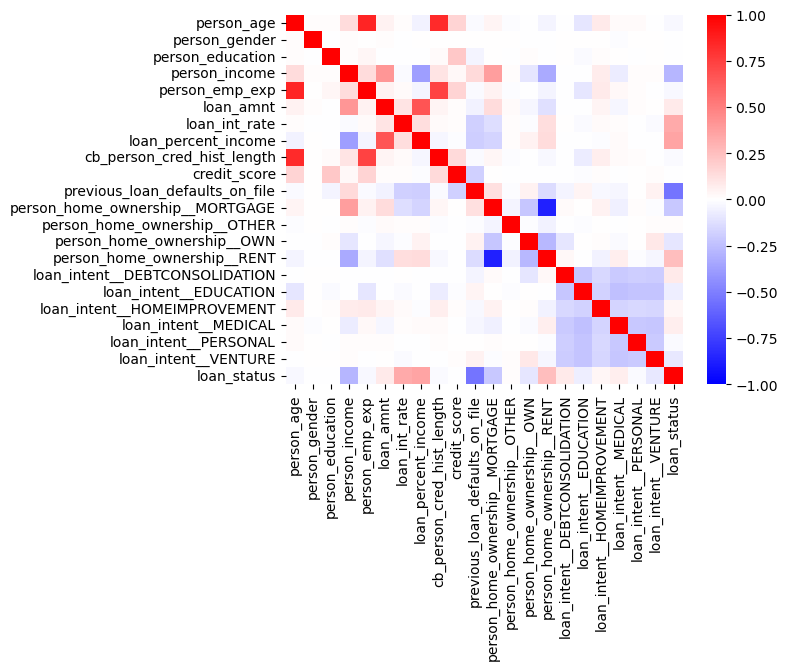

In [199]:
sns.heatmap(pd.concat((X_train, y_train), axis=1).corr(), vmin=-1, vmax=1, cmap="bwr")

## <font color="#CA3532">Construcción y entrenamiento del modelo</font>

In [165]:
def build_model(input_dim, hidden_size, output_dim, optimizer="Adam", l1reg=0.0):
    input_layer = tf.keras.layers.Input(shape=(input_dim,))
    dense_layer = tf.keras.layers.Dense(hidden_size, activation="relu",
                                        kernel_regularizer=tf.keras.regularizers.l1(l1reg))(input_layer)
    dense_layer = tf.keras.layers.Dense(hidden_size, activation="relu")(dense_layer)
    output_layer = tf.keras.layers.Dense(output_dim, activation="softmax")(dense_layer)
    
    model = tf.keras.Model(inputs=input_layer, outputs=output_layer)
    model.compile(loss="sparse_categorical_crossentropy", optimizer=optimizer, metrics=["accuracy"])
    return model

In [230]:
input_dim = X_train.shape[1]
output_dim = len(np.unique(y_train))

hidden_size = 20
l1reg = 0.01 # AJUSTA EL NIVEL DE L1 EN LA ENTRADA PARA FILTRAR MAS O MENOS ATRIBUTOS
learning_rate = 1e-3

optimizer = tf.keras.optimizers.Adam(learning_rate=learning_rate)

model = build_model(input_dim, hidden_size, output_dim, optimizer=optimizer, l1reg=l1reg)
model.summary()

Model: "model_7"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_8 (InputLayer)        [(None, 21)]              0         
                                                                 
 dense_21 (Dense)            (None, 20)                440       
                                                                 
 dense_22 (Dense)            (None, 20)                420       
                                                                 
 dense_23 (Dense)            (None, 2)                 42        
                                                                 
Total params: 902 (3.52 KB)
Trainable params: 902 (3.52 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


Epoch 1/20
282/282 [==============================] - 1s 2ms/step - loss: 0.7720 - accuracy: 0.8485
Epoch 2/20
282/282 [==============================] - 1s 2ms/step - loss: 0.3062 - accuracy: 0.8954
Epoch 3/20
282/282 [==============================] - 1s 2ms/step - loss: 0.2575 - accuracy: 0.8972
Epoch 4/20
282/282 [==============================] - 1s 2ms/step - loss: 0.2435 - accuracy: 0.9014
Epoch 5/20
282/282 [==============================] - 1s 2ms/step - loss: 0.2365 - accuracy: 0.9042
Epoch 6/20
282/282 [==============================] - 1s 2ms/step - loss: 0.2321 - accuracy: 0.9069
Epoch 7/20
282/282 [==============================] - 1s 2ms/step - loss: 0.2292 - accuracy: 0.9081
Epoch 8/20
282/282 [==============================] - 1s 2ms/step - loss: 0.2269 - accuracy: 0.9089
Epoch 9/20
282/282 [==============================] - 1s 2ms/step - loss: 0.2249 - accuracy: 0.9089
Epoch 10/20
282/282 [==============================] - 1s 2ms/step - loss: 0.2242 - accuracy: 0.9089

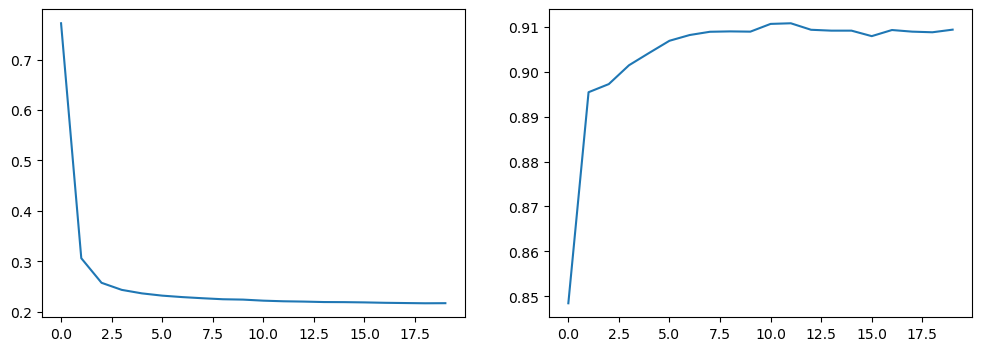

In [231]:
h = model.fit(X_train, y_train, batch_size=128, epochs=20)
plt.figure(figsize=(12, 4))
plt.subplot(1,2,1)
plt.plot(h.history["loss"])
plt.subplot(1,2,2)
plt.plot(h.history["accuracy"])
plt.show()

In [232]:
model.evaluate(X_test, y_test)

282/282 [==============================] - 0s 1ms/step - loss: 0.2189 - accuracy: 0.9099


[0.21891967952251434, 0.9098888635635376]

## <font color="#CA3532">Explicabilidad del modelo</font>

Representemos una red neuronal completa con Graphviz.

In [233]:
from graphviz import Digraph

def draw_network(inputs, hidden, outputs, color_input=None, input_names=None):
    # Crear un grafo dirigido
    dot = Digraph(comment='Ejemplo de Grafo Dirigido')
    dot.attr(rankdir='LR')
    
    if input_names is None:
        input_names = [str(i+1) for i in range(inputs)]

    # Agregar nodos
    for i in range(inputs):
        if color_input == i+1:
            dot.node('x'+str(i+1), input_names[i], color="red")
            dot.node("i"+str(i+1), "", shape="point", style='invis')
            dot.edge("i"+str(i+1), "x"+str(i+1), color="red")
        else:
            dot.node('x'+str(i+1), input_names[i])
            dot.node("i"+str(i+1), "", shape="point", style='invis')
            dot.edge("i"+str(i+1), "x"+str(i+1))
        
    for i in range(hidden):
        dot.node('h1_'+str(i+1), 'h1_'+str(i+1))
        dot.node('h2_'+str(i+1), 'h2_'+str(i+1))
        
    for i in range(outputs):
        dot.node('y'+str(i+1), 'y'+str(i+1))
        dot.node("o"+str(i+1), "", shape="point", style='invis')
        dot.edge("y"+str(i+1), "o"+str(i+1))

    for i in range(inputs):
        for j1 in range(hidden):
            if color_input == i+1:
                dot.edge("x"+str(i+1), "h1_"+str(j1+1), color="red")
            else:
                dot.edge("x"+str(i+1), "h1_"+str(j1+1))
                
    for j1 in range(hidden):
        for j2 in range(hidden):
            dot.edge('h1_'+str(j1+1), 'h2_'+str(j2+1))
    for j1 in range(hidden):
        for k in range(outputs):
            dot.edge('h2_'+str(j1+1), 'y'+str(k+1))
    return dot

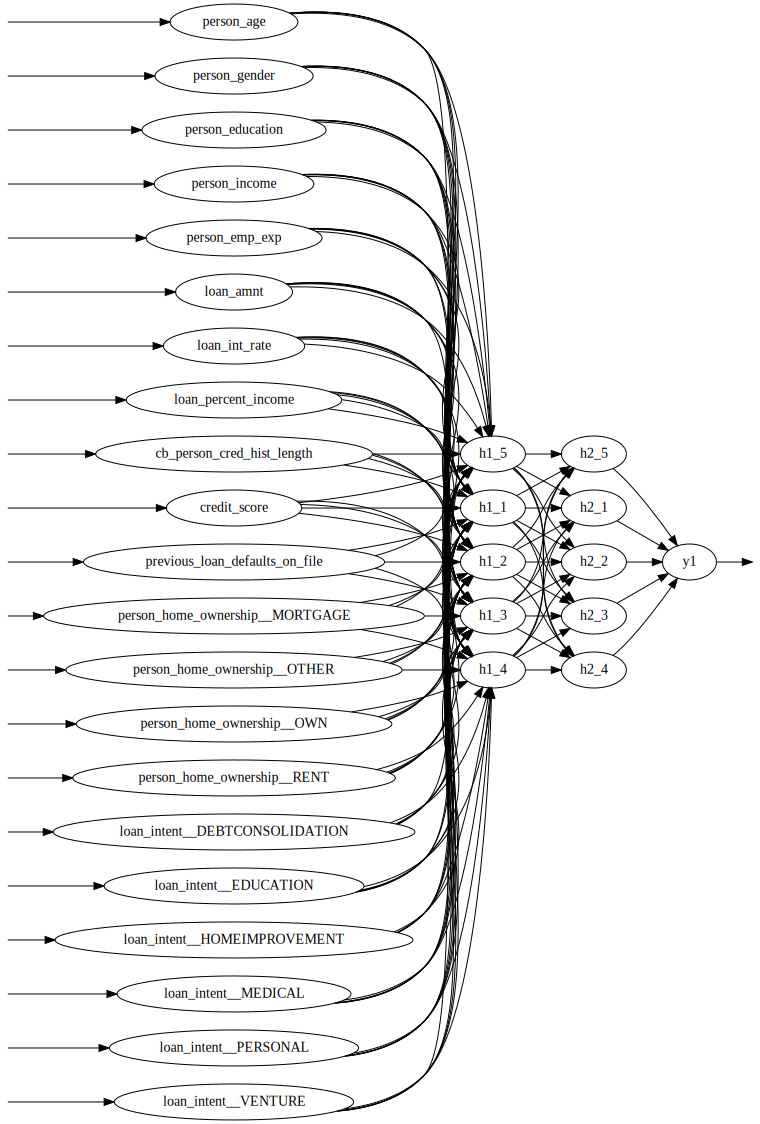

In [234]:
draw_network(X_train.shape[1], 5, 1, input_names=X.columns)

### <font color="#CA3532">Hagamos selección de atributos según los pesos</font>

Intentemos hacer selección de atributos según los pesos de la red...

Esperad. Ahora no tenemos una matriz de pesos $\mathbf{W}$, sino que tenemos **tres matrices** $\mathbf{W}^{h1}$, $\mathbf{W}^{h2}$ y $\mathbf{W}^y$. ¿Qué hacemos?

Vamos a pensar... Una entrada está conectada a muchas neuronas en la capa oculta.

¿Y si consideramos la suma de pesos como **cómo influye la entrada en total a todas las neuronas de la capa oculta**?

$$R_{xi} = \sum_j |W^{h1}_{ij}|$$

Esto se conoce como **relevancia global de los atributos de entrada según los pesos en valor absoluto**. Nos ayuda a entender cómo cada entrada influye en general en el modelo.

In [235]:
def global_relevance(model):
    w = model.layers[1].weights[0]
    R = np.abs(w).sum(axis=1)
    return R

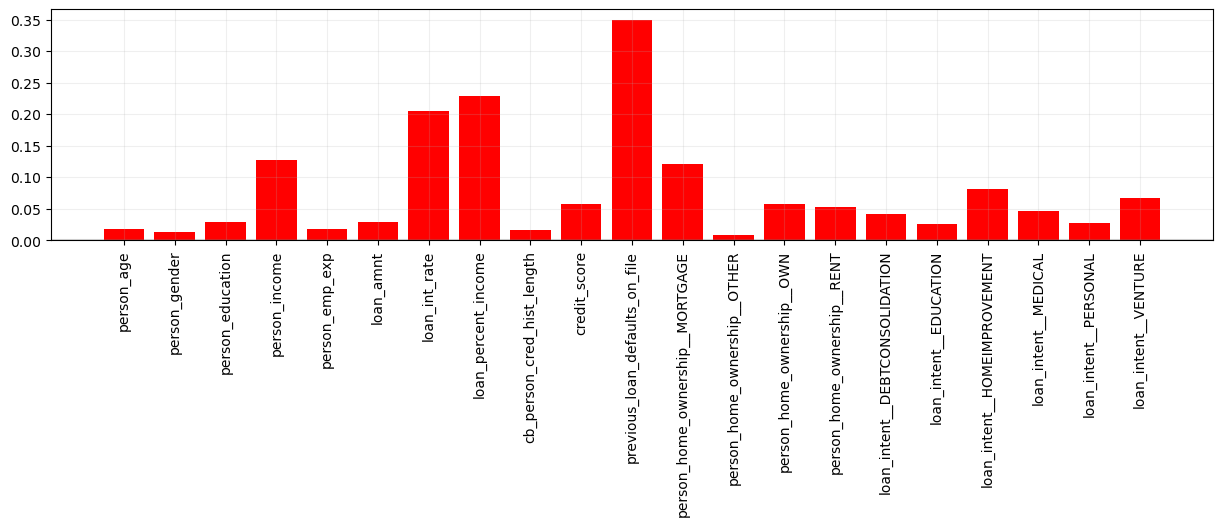

In [236]:
R = global_relevance(model)

plt.figure(figsize=(15, 3))
plt.bar(range(X_train.shape[1]), R, color="red")
plt.xticks(range(X_train.shape[1]), X.columns, rotation=90)
plt.grid(alpha=0.2)
plt.axhline(0.0, color="gray", alpha=0.3)
plt.show()

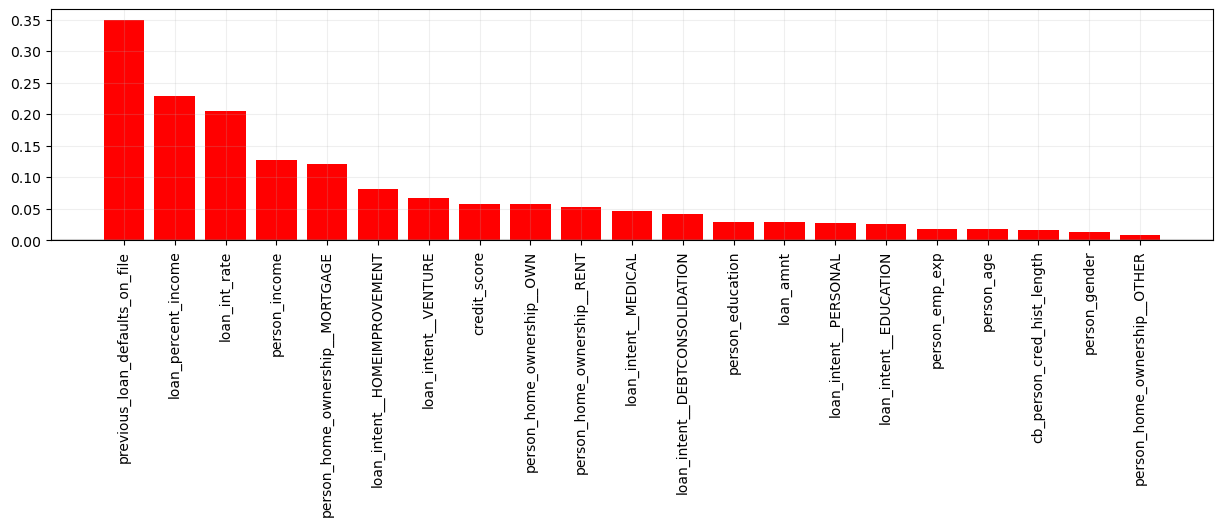

In [250]:
df = pd.DataFrame(R, index=X.columns, columns=["R"])
df = df.sort_values(by="R", ascending=False)
plt.figure(figsize=(15, 3))
plt.bar(range(len(df)), df["R"], color="red")
plt.xticks(range(len(df)), df.index, rotation=90)
plt.grid(alpha=0.2)
plt.axhline(0.0, color="gray", alpha=0.3)
plt.show()

###  <font color="#CA3532">Hagamos explicabilidad de la red según la derivada</font>

Recordad que para la explicabilidad de cualquier modelo basado en redes neuronales, una opción es calcularla a partir de sus gradientes (**Gradient x Input**). 

- Si quieres decir qué atributos han sido relevantes para tomar la decisión para la clase $y_c$:

$$R_{\mathbf{x}}^c = \mathbf{x} \cdot \nabla_\mathbf{x}(y_c)$$

- Si quieres explicar cómo se va a comportar el modelo para cada clase $y_c$:

$$R_{\mathbf{x}}^c = |\mathbf{x}| \cdot \nabla_\mathbf{x}(y_c)$$

In [340]:
def grad_x_input(x, model, relevancia=True, class_to_explain=0):
    with tf.GradientTape(persistent=True) as tape:
        x = tf.convert_to_tensor(x)
        tape.watch(x)
        y = model(x)
        y = y[:, class_to_explain]
        
    grad = tape.gradient(y, x)
    
    if relevancia:
        return (x * grad).numpy()
    else:
        return (np.abs(x) * grad).numpy()

In [341]:
R = grad_x_input(X_train, model, relevancia=True, class_to_explain=1)
R.shape

(36000, 21)

1/1 [==============================] - 0s 16ms/step


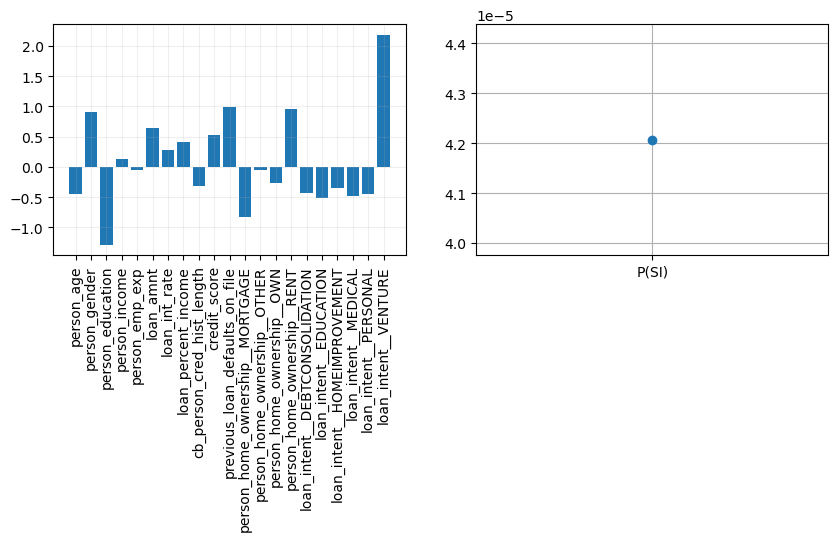

In [348]:
item = 1 # Modificar esta variable para evaluar otros ejemplos

ypred_real = model.predict(X_train.values[item][None, :])[0, 1]

plt.figure(figsize=(10, 3))
plt.subplot(1,2,1)
plt.bar(range(X_train.shape[1]), X_train.values[item])
plt.xticks(range(X_train.shape[1]), X_train.columns, rotation=90)
plt.grid(alpha=0.2)
plt.subplot(1,2,2)
plt.plot(ypred_real, 'o', label="Predicción real")
plt.xticks([0], ["P(SI)"])
plt.grid()
plt.show()

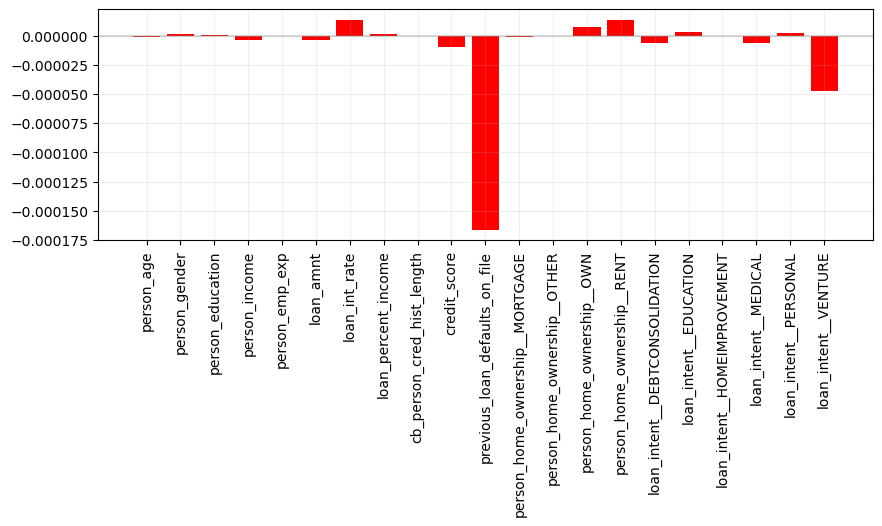

In [349]:
plt.figure(figsize=(10, 3))
plt.bar(range(X_train.shape[1]), R[item], color="red")
plt.xticks(range(X_train.shape[1]), X_train.columns, rotation=90)
plt.grid(alpha=0.2)
plt.axhline(0.0, color="gray", alpha=0.3)
plt.show()

In [350]:
from ipywidgets import interact, interactive, FloatSlider, VBox, Dropdown
import ipywidgets as widgets

In [352]:
one_hot_groups = {
    "person_home_ownership": ["person_home_ownership__MORTGAGE", 
                              "person_home_ownership__OTHER", 
                              "person_home_ownership__OWN", 
                              "person_home_ownership__RENT"],
    "loan_intent": ["loan_intent__DEBTCONSOLIDATION", 
                    "loan_intent__EDUCATION", 
                    "loan_intent__HOMEIMPROVEMENT", 
                    "loan_intent__MEDICAL", 
                    "loan_intent__PERSONAL", 
                    "loan_intent__VENTURE"]
}

x_original = X_train.values[item].copy()

# Creamos un diccionario de sliders (uno por variable)
sliders = {}
columnas_excluidas = {col for group in one_hot_groups.values() for col in group}

for col in X_train.columns:
    if col in columnas_excluidas:
        continue  # las dummies se gestionan aparte

    val = x_original[X_train.columns.get_loc(col)]
    col_min = X_train[col].min()
    col_max = X_train[col].max()
    delta = (col_max - col_min) * 0.1 or 0.1

    sliders[col] = FloatSlider(
        value=val,
        min=col_min - delta,
        max=col_max + delta,
        step=(col_max - col_min) / 100 or 0.01,
        description=col,
        continuous_update=False,
        layout=widgets.Layout(width='500px'),
        style={'description_width': '200px'}
    )

# Añadir dropdowns para las variables one-hot
for group_name, values in one_hot_groups.items():
    active_idx = np.argmax([x_original[X_train.columns.get_loc(v)] for v in values])
    sliders[group_name] = Dropdown(
        options=values,
        value=values[active_idx],
        description=group_name,
        layout=widgets.Layout(width='400px'),
        style={'description_width': '150px'}
    )

# Función que recibe los valores modificados
def actualizar_figura(**kwargs):
    x_mod = x_original.copy()

    # Actualizamos las variables numéricas
    for col in X_train.columns:
        if col in columnas_excluidas:
            continue
        idx = X_train.columns.get_loc(col)
        x_mod[idx] = kwargs[col]

    # Actualizamos las variables one-hot
    for group_name, values in one_hot_groups.items():
        seleccionada = kwargs[group_name]
        for val in values:
            idx = X_train.columns.get_loc(val)
            x_mod[idx] = X_train.iloc[:, idx].max() if val == seleccionada else X_train.iloc[:, idx].min()

    R = grad_x_input(x_original[None, :], model, relevancia=False, class_to_explain=1)[0]
    R_mod = grad_x_input(x_mod[None, :], model, relevancia=False, class_to_explain=1)[0]
    ypred_real = model.predict(x_original[None, :], verbose=0)[0, 1]
    ypred_mod = model.predict(x_mod[None, :], verbose=0)[0, 1]

    plt.figure(figsize=(10, 3))
    plt.bar(range(X_train.shape[1]), R[item], label="Original", alpha=0.6)
    plt.bar(range(X_train.shape[1]), R_mod, label="Modificado", alpha=0.6)
    plt.xticks(range(X_train.shape[1]), X_train.columns, rotation=90)
    plt.grid(alpha=0.2)
    plt.axhline(0.0, color="gray", alpha=0.3)
    plt.legend()
    plt.show()

    plt.figure(figsize=(12, 8))
    plt.subplot(1, 2, 1)
    plt.bar(range(len(x_original)), x_original, label='Original', alpha=0.6)
    plt.bar(range(len(x_mod)), x_mod, label='Modificado', alpha=0.6)
    plt.xticks(range(len(x_original)), X_train.columns, rotation=90)
    plt.grid(alpha=0.2)
    plt.title(f"Entradas del modelo (item #{item})")
    plt.legend()

    plt.subplot(1, 2, 2)
    plt.plot([0], [ypred_real], 'o', label="Original")
    plt.plot([0], [ypred_mod], 'o', label="Modificado")
    plt.xticks([0], ["P(SI)"])
    plt.ylim(0, 1)
    plt.grid()
    plt.title("Predicción del modelo")
    plt.legend()
    plt.axhline(0.5, color="green", alpha=0.7)

    plt.tight_layout()
    plt.show()

# Mostrar la interfaz interactiva
out = interactive(actualizar_figura, **sliders)
display(out)


interactive(children=(FloatSlider(value=-0.4497540593861829, continuous_update=False, description='person_age'…